In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv (r"c:\Users\bhara\Downloads\house-prices (1).csv")

# Display basic info about the dataset
df_info = df.info()

# Display the first few rows
df_head = df.head()

# Display summary statistics
df_description = df.describe()

df_info, df_head, df_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


(None,
    Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
 0     1  114300  1790         2          2       2    No         East
 1     2  114200  2030         4          2       3    No         East
 2     3  114800  1740         3          2       1    No         East
 3     4   94700  1980         3          2       3    No         East
 4     5  119800  2130         3          3       3    No         East,
              Home          Price         SqFt    Bedrooms   Bathrooms  \
 count  128.000000     128.000000   128.000000  128.000000  128.000000   
 mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
 std     37.094474   26868.770371   211.572431    0.725951    0.514492   
 min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
 25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
 50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
 75%     96.250000  148250.000000  2140.000000  

In [4]:
# Drop 'Home' column as it's not useful for predictions
df = df.drop(columns=['Home'])

# Encode categorical variables
df = pd.get_dummies(df, columns=['Brick', 'Neighborhood'], drop_first=True)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Define independent variables (X) and target variable (y)
X = df.drop(columns=['Price'])
y = df['Price']

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Square Error
r2 = r2_score(y_test, y_pred)  # R² Score

rmse, r2


c:\Users\bhara\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(10685.05584704818, 0.8062934622232133)

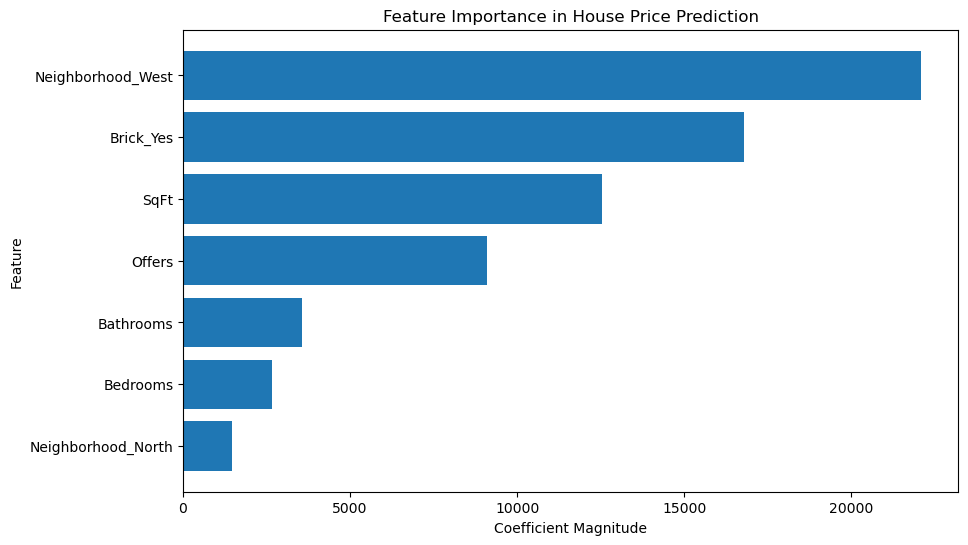

In [6]:
# Get feature importance (model coefficients)
feature_importance = pd.Series(model.coef_, index=X.columns)

# Sort features by absolute importance
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Feature Importance in House Price Prediction")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
